Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Question 1 (25%)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_64914/2134061249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


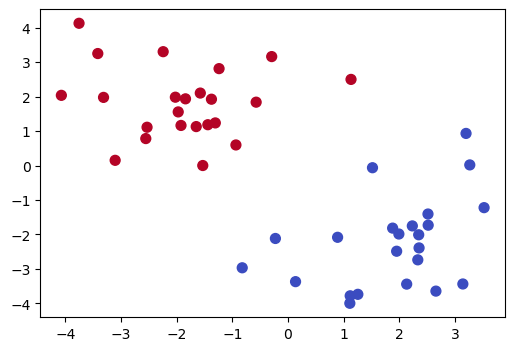

,x1,x2,y
0,2.515039,-1.408103,0
1,1.952127,-2.488405,0
2,2.354953,-2.391813,0
3,0.135739,-3.371490,0
4,-0.226275,-2.118110,0
5,1.880152,-1.817401,0
6,2.657739,-3.646232,0
7,3.141584,-3.439089,0
8,1.255008,-3.739220,0
9,2.332197,-2.738413,0


In [3]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()
data1

### a. Report the separating hyperplane (line) (5%).

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_64914/3125758283.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


<function matplotlib.pyplot.show(close=None, block=None)>

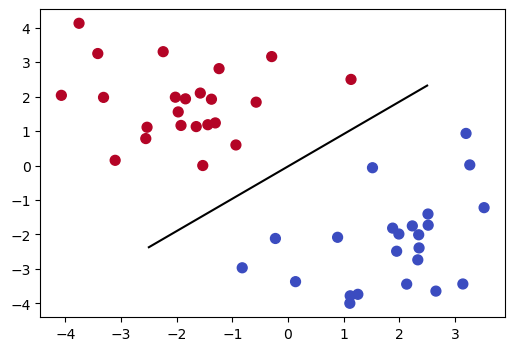

In [4]:
# your code here
from sklearn import svm
clf = svm.SVC(kernel='linear', C=100000) # You can try other C; for this example the model is not too sensitive to choice of C.
clf.fit(X, Y)
# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.
plt.plot(x1, x2, 'k-')
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show

### b. List the support vectors (5%).

In [5]:
# your code here
b = clf.support_vectors_
b

array([[ 1.5180363e+00, -6.3993825e-02],
       [ 1.1323244e+00,  2.5000131e+00],
       [-1.5313310e+00,  1.2000000e-05]])

### c. Calculate and report the upper and lower hyperplanes (lines) of the margin (5%).

In [6]:
# your code here
b1 = clf.support_vectors_[0]
x2_down = a * x1 + (b1[1] - a * b1[0])

b2 = clf.support_vectors_[-1]
x2_up = a * x1 + (b2[1] - a * b2[0])

### d. Compute and report the width of the margin (5%). 

#### Optional: you can also add a plot showing all points, the separating hyperplane that passes through the support vectors for 5% extra credit.

In [7]:
# your code here
w_margin = (abs(b2[1] - a * b2[0])-(b1[1] - a * b1[0]))/(np.sqrt(a**2+1))
w_margin

2.133624846780697

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_64914/1476129327.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


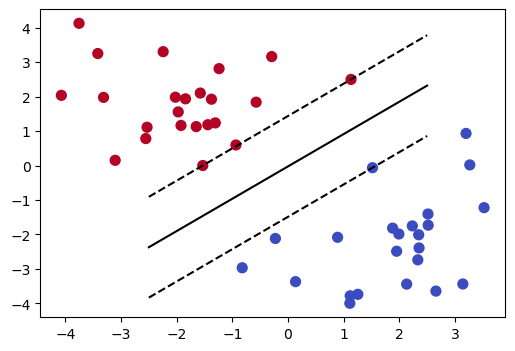

In [8]:
# optional plot here
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


plt.axis('tight')
plt.show()

### e. What would you expect to happen to the margin if the constant C was made very small? (5%)

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

Larger C make the model's hyperline more closely stcik with the data. It might caused the overfitting. And smaller C ignor the boundary of the data easily, so it might affact the accuracy of the prediction.

## Question 2 (25%)

### Given the dataset provided below, answer the following questions:

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_64914/1785234660.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


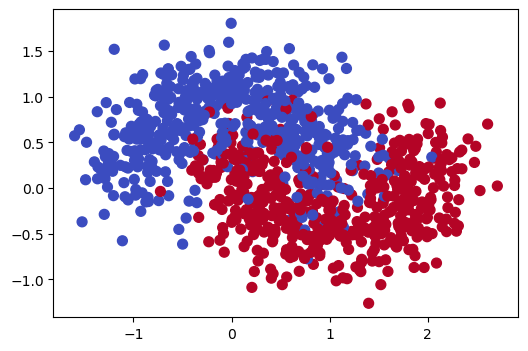

In [9]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy (4%).

In [10]:
from sklearn.model_selection import train_test_split
IS = []


clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

correct=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
IS.append(correct)
    
print("In sample, we successfully predict {} percent of the data".format((np.mean(correct))*100))


In sample, we successfully predict 84.92537313432837 percent of the data


In [11]:
# Let's see how we do out of sample, dividing the dataset into training and test, and averaging over 10 random splits.
from sklearn.model_selection import train_test_split
OS = []


clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)
OS.append(correct)
    
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(correct))*100))


Out of sample, we successfully predict 85.15151515151516 percent of the data


### Next we will use the validation subset (part of the training set) in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree. (8%)


For degree 1, max log(C) = 0.7471739273856247, max accuracy value is 0.8288288288288288

For degree 2, max log(C) = 0.1705299699102887, max accuracy value is 0.7387387387387387

For degree 3, max log(C) = 4.844719976266273, max accuracy value is 0.8648648648648649

For degree 4, max log(C) = 0.18667391397680153, max accuracy value is 0.7297297297297297



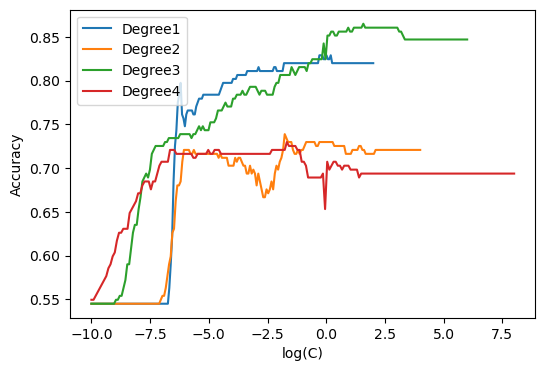

In [12]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here
import math
for degree in range(1, 5):
    C = [math.exp(i) for i in np.linspace(-10, 2*degree, 200)]
    OS_validation = []
    for c in C:
        clf = svm.SVC(kernel='poly', degree=degree, C=c)
        clf.fit(X_train_1, Y_train_1)
        correct = 1.0 * (clf.predict(X_vali) == np.asarray(Y_vali)).sum() / len(Y_vali)  # OS score for validation set
        OS_validation.append(correct)

    temp = pd.DataFrame([C, OS_validation]).T  # put results together.

    C_log = [np.log(y) for y in C]  # for a better graph

    plt.plot(C_log, OS_validation, label=f'Degree{degree}')
    print(f'For degree {degree}, max log(C) = {temp.iloc[temp[1].idxmax()][0]}, max accuracy value is {temp.iloc[temp[1].idxmax()][1]}\n')


plt.legend(loc='upper left')
plt.ylabel('Accuracy')    
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()


### c. Explain how each of these selected parameters can impact the performance of the model. Provide insights into the consequences of choosing different values for these parameters, particularly in terms of overfitting, accuracy, generalization, and other (5%).

Your answer here. You can justify your intuitions with examples if you want.

polynomial degrees can determine the the function of curve that fits the data, the more degree of the polynomial, the more curve the function has, how ever, it might casue the overfitting since the funciton is too complicated. The regularization parameter C influences the trade-off between simplicity and accuracy; lower C values promote generalization at the risk of underfitting, while higher C values aim for higher accuracy on the training data but may overfit.

### d. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected (8%). 

In [13]:
# Let's see how we do out of sample, dividing the dataset into training and test, and averaging over 10 random splits.
from sklearn.model_selection import train_test_split
OS = []


clf = svm.SVC(kernel='poly', degree=3, C=np.exp(4.844)) 
clf.fit(X_train, Y_train)

correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)
OS.append(correct)
    
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(correct))*100))


Out of sample, we successfully predict 86.36363636363636 percent of the data


## Question 3 (10%)

### This task is to be done with manual calculations rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes

11 total

### Questions (just add responses below, and show how you got this result):

#### a. Calculate and repor the following sample probabilities (5%):

P(Yes)= 6/11

P(No)= 5/11

P(Red|Yes)= 5/6

P(SUV|Yes)= 1/3

P(Domestic|Yes)= 1/2

P(Red|No)= 2/5

P(SUV|No)= 3/5

P(Domestic|No)= 3/5

#### b. Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work (5%).

Your answer here.

P(Yes | red & domestic & SUV)=
        ((5/6)(1/2)(1/3)(6/11))/((5/6)(1/2)(1/3)(6/11)+(2/5)(3/5)(3/5)(5/11))
        =125/233


## Question 4 (15%)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [14]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre  glu  blood_p  triceps  serum   b_m  pedigree_f  age
0      3  158       64       13    387  31.2       0.295   24
1      0   84       64       22     66  35.8       0.545   21
2      9  120       72       22     56  20.8       0.733   48
3      4  110       76       20    100  28.4       0.118   27
4      2  100       66       20     90  32.9       0.867   28


### a. What is the prediction accuracy for Naive Bayes, both in-sample (on the training data) and out-of-sample (on the test data)? (3%)

In [15]:
# your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))


In sample prediction accuracy: 0.7415254237288136
Out of sample prediction accuracy: 0.7025316455696202


### b. What is the prior probability of diabetes, learned from the training data? (3%)

In [16]:
# your code here
d = len(data_train.loc[data_train['y']==1])/len(data_train)
d

0.326271186440678

### c. What is the mean and variance of each input variable for patients with diabetes? (3%)

In [17]:
# your code here
dia = data_train.loc[data_train['y']==1]

means = dia.mean()
variances = dia.var()


print("Means:\n", means)
print("\nVariances:\n", variances)

Means:
 Unnamed: 0    372.818182
y               1.000000
t_pre           4.000000
glu           142.064935
blood_p        74.389610
triceps        33.168831
serum         200.220779
b_m            34.890909
pedigree_f      0.614195
age            35.441558
dtype: float64

Variances:
 Unnamed: 0    48300.598086
y                 0.000000
t_pre            12.763158
glu             977.429938
blood_p         181.267259
triceps         109.168489
serum         16018.542720
b_m              40.052153
pedigree_f        0.187671
age             110.934040
dtype: float64


### d. What is the mean and variance of each input variable for patients without diabetes? (3%)

In [18]:
# your code here
non_dia = data_train.loc[data_train['y']!=1]

means1 = non_dia.mean()
variances1 = non_dia.var()


print("Means:\n", means1)
print("\nVariances:\n", variances1)

Means:
 Unnamed: 0    392.893082
y               0.000000
t_pre           2.672956
glu           111.238994
blood_p        69.088050
triceps        27.113208
serum         128.257862
b_m            31.737736
pedigree_f      0.474289
age            28.283019
dtype: float64

Variances:
 Unnamed: 0    42351.323939
y                 0.000000
t_pre             6.436669
glu             601.664039
blood_p         139.371945
triceps         103.126343
serum          8542.065998
b_m              40.395149
pedigree_f        0.086169
age              69.318128
dtype: float64


### e. What are some potential steps you may want to use to improve the prediction accuracy? (3%)

Use differnet modles like CategoricalNB or MultinomialNB from sklearn.naive_bayes.

## Question 5 (25%)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [19]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  6  2
2  2  6  2
3  6  2  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  6
8  5  1  1
0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    1
Name: y, dtype: int64


### a. Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy (10%).

In [20]:
# Training a binary Gaussian Naive Bayes Classifier with real-valued input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [21]:
# your code here
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)

y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)


# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

In sample prediction accuracy: 0.8888888888888888
Out of sample prediction accuracy: 0.6388888888888888


### b. Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer) (15%). 

In [22]:
# your code here
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

b. Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer) (15%). 

In [23]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
In sample prediction accuracy: 0.6666666666666666
Out of sa